In [1]:
%pylab inline
from datetime import date
from app import create_app
from app.instrument import Instrument
from app.analysis import Quote
with create_app().app_context():
    quote = Quote([b.symbol for b in Instrument.find_reits()], 100)
f'from {quote.start.date()} to {date.today()}'

Populating the interactive namespace from numpy and matplotlib


'from 2019-02-25 to 2019-06-04'

In [2]:
quote.statistics(21)

,21-len,21-mean,21-std,21-shrp,drawdown
Symbols,,,,,
VNQ,49,1.364941,2.135706,0.558180,3.975014
KBWY,49,1.366178,2.408232,0.495527,6.576831
SCHH,49,0.993273,1.958156,0.418986,4.332364
SRET,49,0.716854,2.232453,0.243688,4.302224
MORT,49,0.136768,2.659220,-0.013562,7.025663
MRRL,49,0.034979,5.108735,-0.026984,13.563406
VNQI,49,0.064201,2.681367,-0.040514,4.665888
REM,49,0.056497,2.635476,-0.044142,7.076853
REML,49,-0.267024,5.676490,-0.077488,14.813703


In [7]:
quote.least_correlated_portfolio(21, 1)

['VNQ'] 0.4355740004090849 0.0 0.9937535146769443 -0.5581795142678594


['VNQ']

In [4]:
quote.least_correlated_portfolio(21, 2, ['VNQ'])

['VNQ', 'KBWY'] 2.8337730168488218 1.2495183596869097 2.6379612945865505 -1.0537066374246384
['VNQ', 'SRET'] 2.4105292341371083 1.1430867475282582 2.069309571588965 -0.8018670849801153


['VNQ', 'SRET']

In [5]:
quote.setup_mask(['VNQ', 'SRET'])
quote.find_optimal_ratio(21, 1)

/Users/chaoyi/.local/share/virtualenvs/portfolio_analysis-bdMx2S3t/lib/python3.7/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


(Symbols
 VNQ     0.551387
 SRET    0.448613
 dtype: float64, 1.0742, 1.9334)

,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
VNQ,49.0,1.364941,2.135706,-2.311019,-0.161094,0.749824,3.064487,5.608280,0.558180,3.975014
Portfolio,49.0,1.071145,1.933665,-1.965234,-0.540958,0.757180,2.607168,5.500999,0.464564,2.677022
SRET,49.0,0.716854,2.232453,-3.606472,-1.074752,1.072211,2.488528,5.368011,0.243688,4.302224


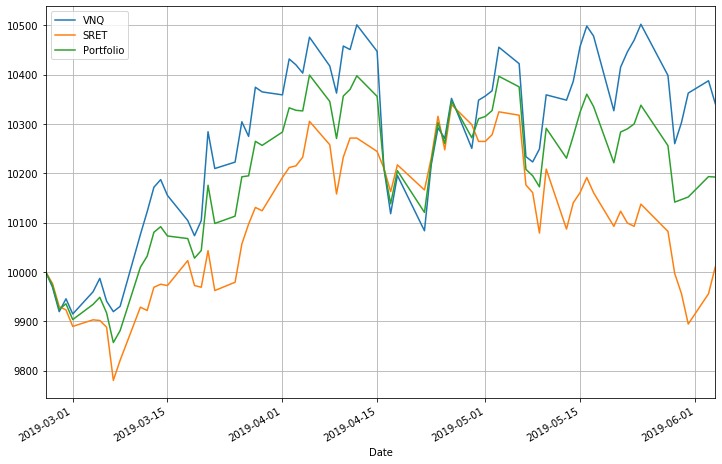

In [6]:
quote.graph(21, {'VNQ': .55, 'SRET': .45})